# Neural Network based Digit Classifier

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 

## Loading Data from mnist data set

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
print("size: ",x_train.shape)

size:  (60000, 28, 28)


### Visualizing loaded data set

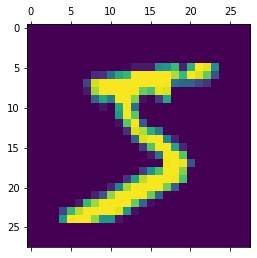

In [3]:
#visualizing the first training image
plt.matshow(x_train[0])

In [4]:
y_train[0]

5

In [5]:
#Scaling the obtained values for better accuracy
x_train = x_train/255
x_test = x_test/255

In [6]:
#converting 2D array into an 1D array using pandas function
x_train_flattened = x_train.reshape(len(x_train), 28*28) 
x_test_flattened = x_test.reshape(len(x_test), 28*28)
print("shapes: ",x_train_flattened.shape, x_test_flattened.shape)

shapes:  (60000, 784) (10000, 784)


## Creating a Single layered NN using perceptron for classification
The perceptron is the simplest form of neural networks used for the classification of patterns said to be linearly separable. It consists of a single neuron with adjustable synaptic weights and bias.

In [7]:
#Sequentila means stack of layers
#Dense means that the every neuron in the layer is connected to every neuron in the forwawrd layer
simple_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

#Compiling the neural network model using Adaptive movement Estimation algorithm; adam
simple_model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#training the model 5 times using the training data set
simple_model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4658 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2662 - accuracy: 0.9256


### Evaluating the trained model for test data set

In [8]:
simple_model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9267


[0.2644139528274536, 0.9266999959945679]

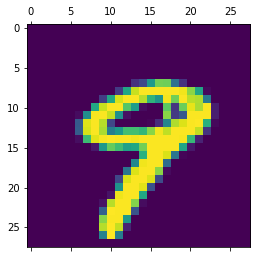

In [9]:
plt.matshow(x_test[9])

In [10]:
y_predicted = simple_model.predict(x_test_flattened)
y_predicted_numbered = [np.argmax(i) for i in y_predicted] #getting the maximum value in the preicted array
print("Predictee value: ", y_predicted_numbered[9]) 

Predictee value:  9


### Visual Analysis using confusion matrix of the predictions

Text(69.0, 0.5, 'True values')

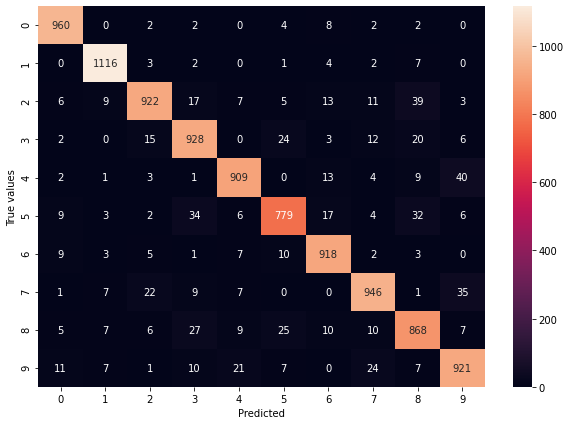

In [11]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_numbered)
import seaborn as sb 
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

## Creating a Multilayered Perceptron Network
A type of multilayer feedforward network that consists of a set of sensory units (source nodes) in the input layer, one or more hidden layers of computation nodes, and an output layer of computation nodes. 
The input signal propagates through the network in a layer-by-layer basis. These networks are applied using the error back-propagation algorithm, which is based on the error-correction learning rule.


In [12]:
#adding hidden layer to improve perforance
hidden_layered_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

hidden_layered_model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hidden_layered_model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4238 - accuracy: 0.8914
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2029 - accuracy: 0.9423
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1514 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9656
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0983 - accuracy: 0.9725


In [13]:
hidden_layered_model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9685


[0.10864164680242538, 0.968500018119812]

Text(69.0, 0.5, 'True values')

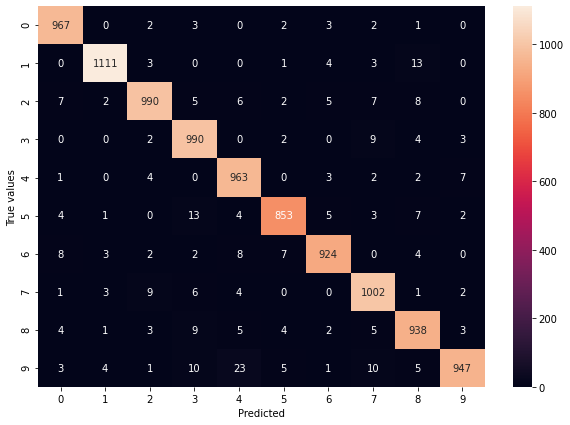

In [14]:
y_predicted = hidden_layered_model.predict(x_test_flattened)
y_predicted_numbered = [np.argmax(i) for i in y_predicted]
y_predicted_numbered[0] #getting the maximum value in the preicted array
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_numbered)
import seaborn as sb 
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

## Adding Layers to improve performance

In [15]:
#adding hidden layer to improve perforance
hidden_layered_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #for not having to use flattened array
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250,activation='sigmoid'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

hidden_layered_model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hidden_layered_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2211 - accuracy: 0.9341
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9894


In [16]:
#hidden_layered_model.save('Hand_digit_recognizer.model')

## Analysis using heatmap

Text(69.0, 0.5, 'True values')

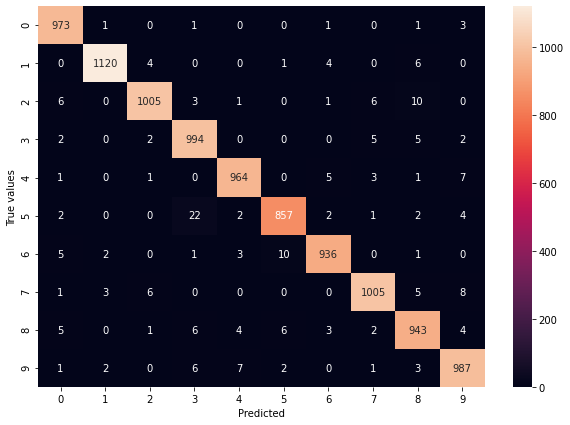

In [17]:
y_predicted = hidden_layered_model.predict(x_test)
y_predicted_numbered = [np.argmax(i) for i in y_predicted]
y_predicted_numbered[0] #getting the maximum value in the preicted array
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_numbered)
import seaborn as sb 
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

## Testing the Network for custom values

the result is probably: 3


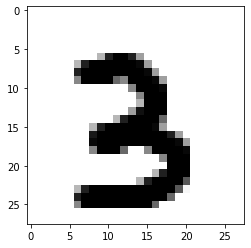

the result is probably: 7


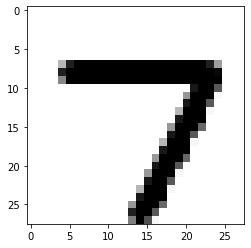

the result is probably: 8


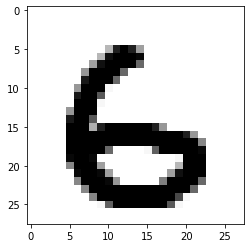

the result is probably: 0


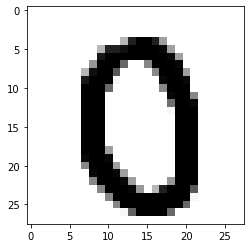

the result is probably: 4


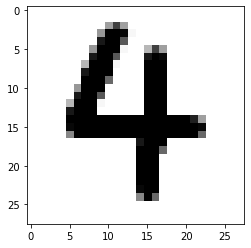

In [18]:
import cv2 as cv
for x in range(1,6):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = hidden_layered_model.predict(img)
    print(f'the result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()